# 데이터의 시각화를 확인하고 이에 따라 전체 데이터를 보는 것이 아닌
# 특정 데이터만 보는 방향으로 진행해봤습니다.

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import seaborn.objects as so

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
# sklearn에서 제공하는 iris 데이터 호출
iris = datasets.load_iris()

In [ ]:
#시각화와 변형을 위해 dataframe형식으로 변수를 설정
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['variety'] =iris.target

# 대신 variety는 품종대신 0, 1, 2로 대체됨

In [ ]:
# 데이터 프레임 확인
# iris_df.head()
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

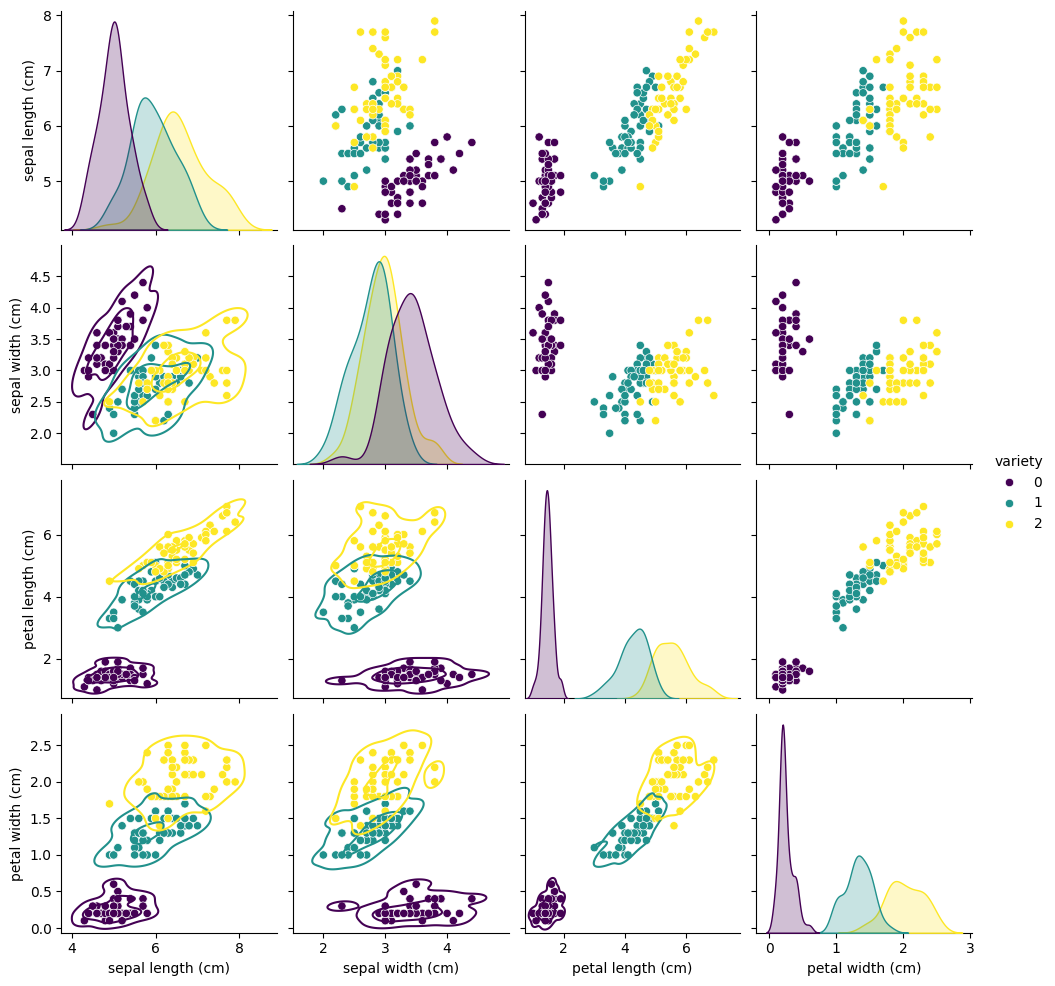

In [ ]:
g = sns.pairplot(iris_df, diag_kind="kde", hue='variety', palette = 'viridis') # pairplot을 통한 시각화: 품종에 따라 색상을 주고 각 feature별로 분석
g.map_lower(sns.kdeplot, levels=3, color=".2")                                 # lower을 사용해 등고선을 그려 분포의 대략적 위치 파악

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


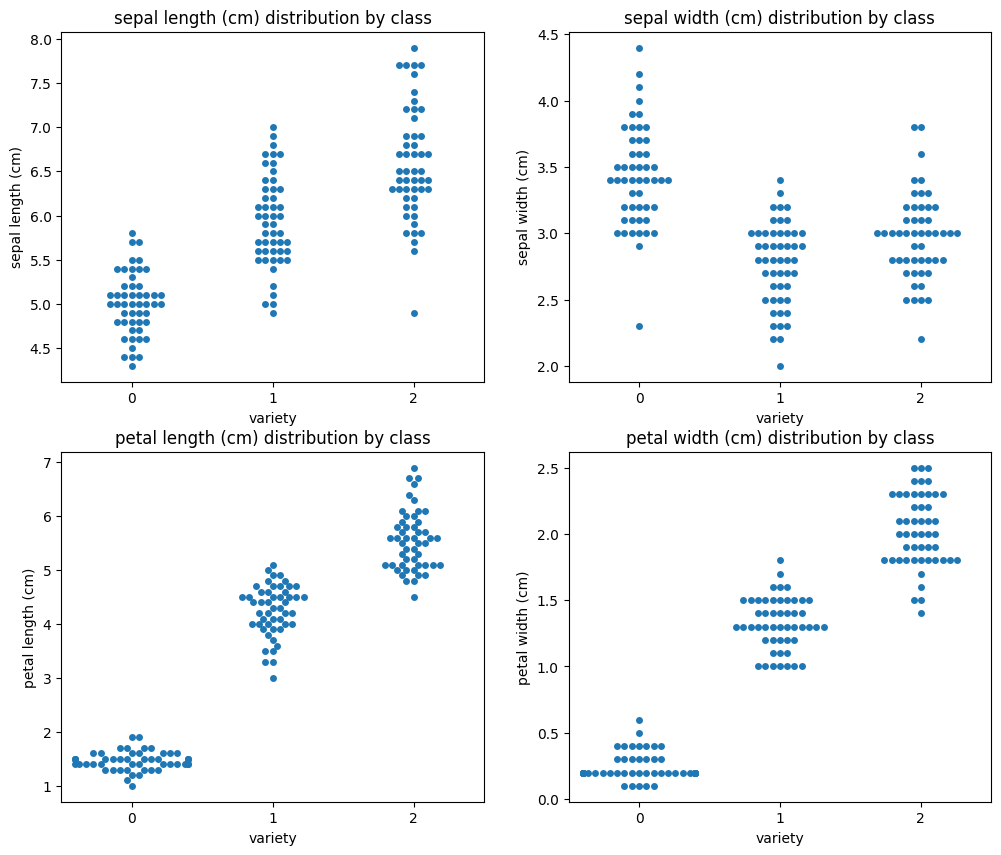

In [ ]:
# 각 꽃잎별로 variety가 어떻게 분포되어 있는지 시각화
plt.figure(figsize=(12, 10))
for i, column in enumerate(iris_df.columns[:-1]):             # 마지막 행이 variety이기 때문에 제외하고 진행
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='variety', y=column, data=iris_df)
    plt.title(f'{column} distribution by class')
plt.show()

In [ ]:
# sklearn에서 제공하는 iris 데이터 호출
iris = datasets.load_iris()


            # sklearn에서 제공하는 model_selection 패키지에서 제공하는 train_test_split()메서드를 활용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=33)

X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape

(105, 4)

In [ ]:
# SVM model accuracy
#svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
#svm.fit(X_train, y_train)

model = svm.SVC(kernel='linear', C=1.0)   # svm모델 사용

model.fit(X_train, y_train)

predictions = model.predict(X_test)       # or y_pred
score = metrics.accuracy_score(y_test, predictions)

print("정확도: {0:0.3f}".format(score))

정확도: 0.956


In [ ]:
print(y_test)
print(predictions)

[1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 2 2 1 1 2 2 1 1 2 2 2 2 2
 1 1 0 1 1 1 0 0]
[1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 1 0 1 2 0 0 2 0 2 1 1 1 2 2 1 1 2 2 2 2 2
 1 1 0 1 1 1 0 0]


In [ ]:
print('잘못 분류된 샘플 개수: %d' % (y_test != predictions).sum())

잘못 분류된 샘플 개수: 2


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Text(0.5, 1.0, 'Confusion Matrix')

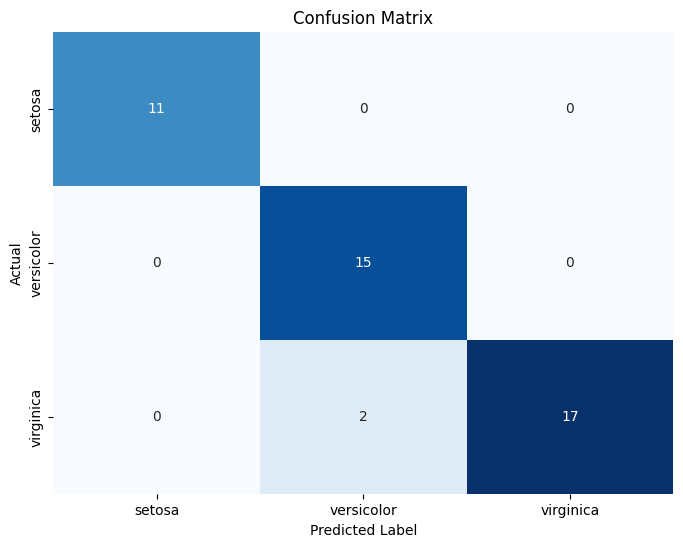

In [ ]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cma = confusion_matrix(y_test, predictions)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cma, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


# 위 산점도를 바탕으로 특정 데이터(sepal width, petal length, petal width)로만 분석
1. petal 데이터만으로 svm을 이용해서 variety분석
2. petal 데이터를 통해 나온 결과를 보고 rbf로 전환

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 시각화를 위해 잠시 df0,1,2를 만들어 각 종에 따른 프레임을 할당해줍니다.
df0 = iris_df[iris_df.variety == 0]
df1 = iris_df[iris_df.variety == 1]
df2 = iris_df[iris_df.variety == 2]

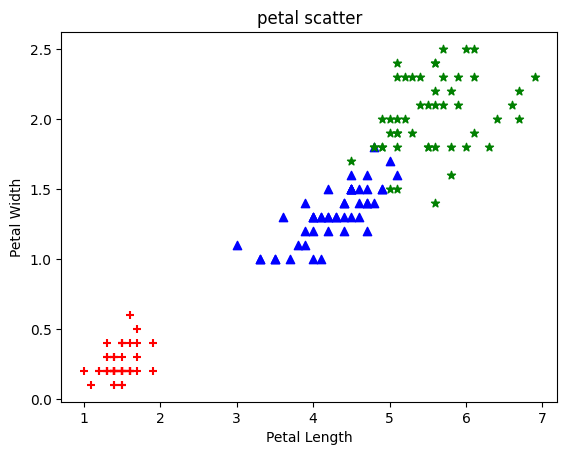

In [ ]:
#plt를 이용해 산점도를 확인합니다.
plt.title('petal scatter')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="red",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='^')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="green",marker='*')

In [ ]:
# petal 데이터만으로 프레임 만들기
# 데이터프레임으로 변하는 과정에서 column의 이름이 변경되었습니다.

petal=iris_df[['petal length (cm)','petal width (cm)','variety']]
petal.head()

,petal length (cm),petal width (cm),variety
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
# petal traing/test set 7:3으로 분리

p_train,p_test=train_test_split(petal,test_size=0.3, random_state=33)  #petals

p_x_train=p_train[['petal width (cm)','petal length (cm)']]
p_y_train=p_train.variety
p_x_test=p_test[['petal width (cm)','petal length (cm)']]
p_y_test=p_test.variety

In [ ]:
#SVM 모델 사용
model = svm.SVC(kernel='linear', C=1.0)

model.fit(p_x_train,p_y_train)
prediction=model.predict(p_x_test)
print('정확도:',metrics.accuracy_score(prediction,p_y_test))

정확도: 0.9777777777777777


In [ ]:
print(metrics.classification_report(p_y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



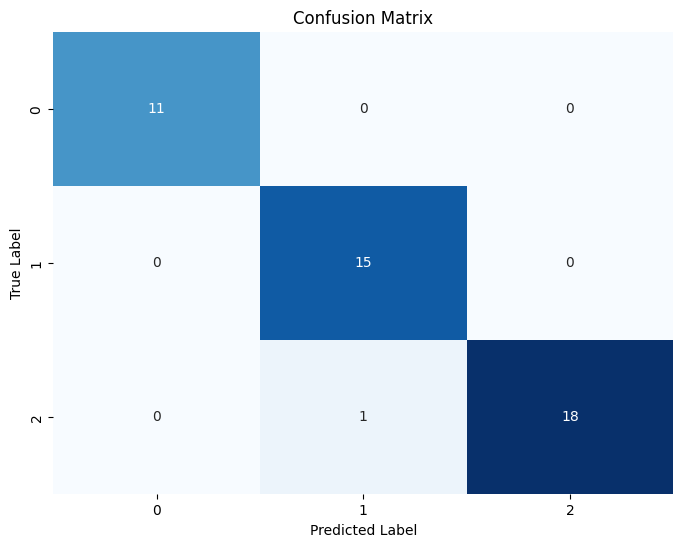

In [ ]:
# 혼동 행렬 계산
cm = confusion_matrix(p_y_test, prediction)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

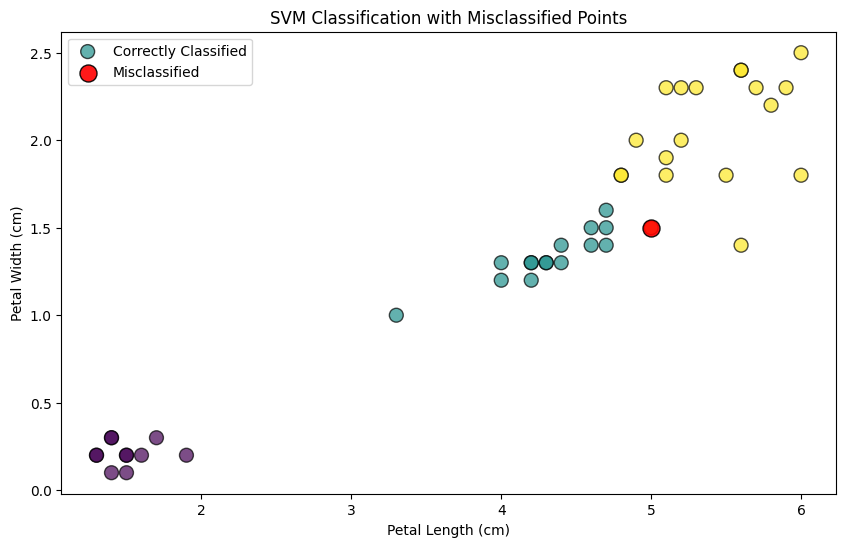

In [ ]:
# 잘못 분류된 포인트 찾기
wrong_indices = np.where(p_y_test != prediction)[0]                   # 실제 레이블과 예측 레이블이 다른지 확인

# 시각화
plt.figure(figsize=(10, 6))

# 전체 테스트 데이터 시각화
plt.scatter(p_test['petal length (cm)'], p_test['petal width (cm)'], c=p_y_test, cmap='viridis', edgecolor='k', s=100, alpha=0.7, label='Correctly Classified')     # 실제 데이터 시각화 petal 요소들/ s= point size
#plt.scatter(p_test.iloc[:, 0], p_test.iloc[:, 1], c=p_y_test, cmap='viridis', edgecolor='k', s=100, alpha=0.7, label='Correctly Classified')

# 잘못된 데이터 시각화
plt.scatter(p_test.loc[p_test.index[wrong_indices], 'petal length (cm)'], p_test.loc[p_test.index[wrong_indices], 'petal width (cm)'], c='red', edgecolor='k', s=150, label='Misclassified', alpha=0.9)
# 위에서 설정한 wrong_indices를 표시/ 실제 데이터와 같은 요소를 사용하되 color와 alpha값으로 보기 쉽게 함
# plt.scatter(p_test.iloc[wrong_indices, 0], p_test.iloc[wrong_indices, 1], c='red', edgecolor='k', s=150, label='Misclassified', alpha=0.9)
# petal 요소들 중 틀린 값들 찾기


plt.title('SVM Classification with Misclassified Points')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

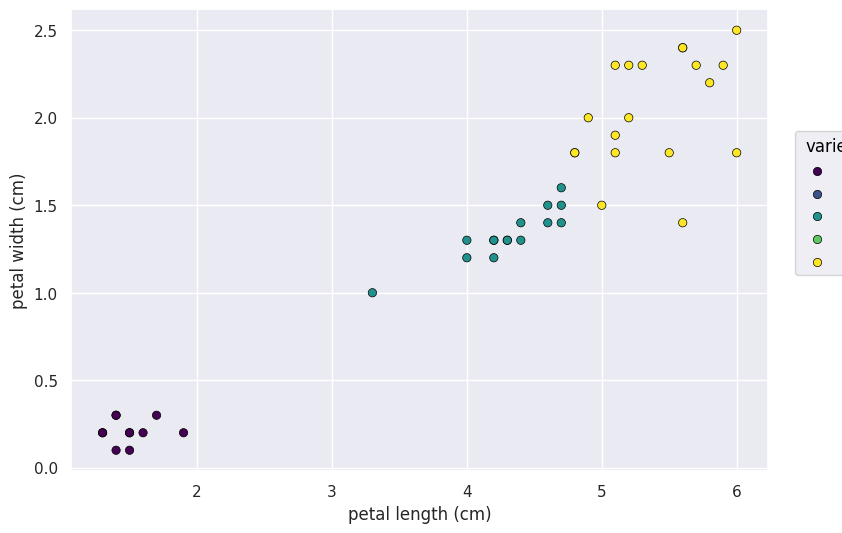

In [ ]:
# 산점도 시각화와 비교
fig = plt.figure(figsize=(9, 6))

(
    so.Plot(petal, p_test['petal length (cm)'], p_test['petal width (cm)'], color="variety")
    .add(so.Dot(edgecolor="black", alpha=1))
    .scale(color="viridis", size=8)
    .on(fig)
).show()

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## kernel을 rbf로 전환해서 분류
linear을 사용한 결과 완벽한 분류 모델을 찾는데 어려움이 있다는 것을 깨달음
<br>따라서 비선형 모델을 사용해 좀 더 완벽한 분류를 시도

In [ ]:
# petal traing/test set 7:3으로 분리

p_train,p_test=train_test_split(petal,test_size=0.3,random_state=33)  #petals

p_x_train=p_train[['petal width (cm)','petal length (cm)']]
p_y_train=p_train.variety
p_x_test=p_test[['petal width (cm)','petal length (cm)']]
p_y_test=p_test.variety

In [ ]:
#SVM 모델 사용
model = svm.SVC(kernel='rbf', C=1.0, gamma = 1)         # svm - rbf kernel 사용

model.fit(p_x_train,p_y_train)
prediction=model.predict(p_x_test)
print('정확도:',metrics.accuracy_score(prediction,p_y_test))

정확도: 0.9777777777777777


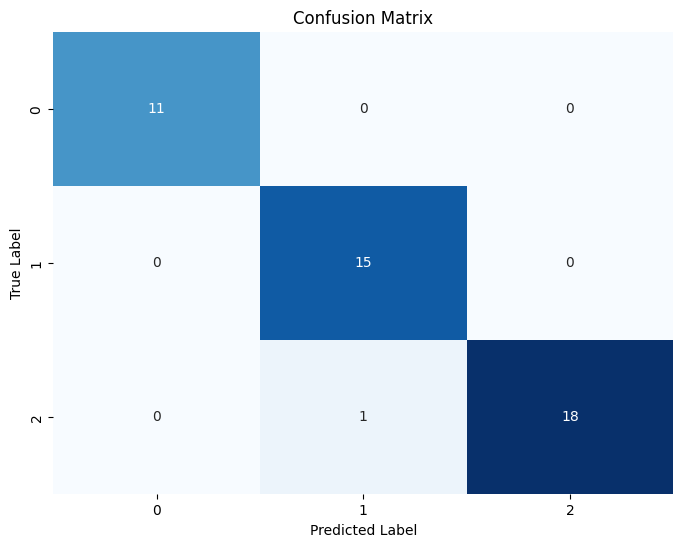

In [ ]:
cm = confusion_matrix(p_y_test, prediction)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


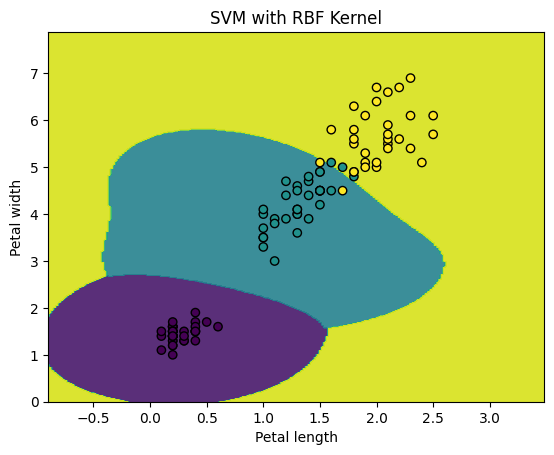

In [ ]:
def plot_decisiion_boundary(X, y, model):
  h = 0.02    #결정경계의 해상도, 매쉬그리드의 간격을 0.02로 설정
  # Access the columns by name  using `.iloc`
  x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1                   # p_x_train에서 불러왔기 때문에 petal 데이터 값이 0,1에 존재
  y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1                   # petal witdh/ 최솟값, 최댓값을 구하고 각각 +-1을 해서 경계범위 설정
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    # h(해상도)를 가지고 x, y축 범위 내에 그리드 생성
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])                                # 그리드 포인트 평탄화 후 예측
  Z = Z.reshape(xx.shape)                                                         # 변형


  plt.contourf(xx, yy, Z, alpha=0.9)                                              # 등고선 형태
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
  plt.xlabel('Petal length')
  plt.ylabel('Petal width')
  plt.title('SVM with RBF Kernel')
  plt.show()

# 결정경계 시각화
plot_decisiion_boundary(p_x_train, p_y_train, model)                        # petal 데이터로 분석

In [ ]:
# Iris 데이터 새로 load, 이전 데이터는 너무 난잡하기 때문에 새로 불러오기
iris = datasets.load_iris()
feature_names = iris.feature_names

# 원하는 특성 선택 함수
def get_features(X, feature_idx1, feature_idx2):                                    #주어진 데이터(x)에서 2개의 feature를 가져오는 함수를 생성
    return X[:, [feature_idx1, feature_idx2]]

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model, feature_names, i, j):
    # 축의 범위 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1                             #데이터의 최소 및 최대 값을 계산하여 축의 범위를 설정
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    # 모델의 결정 경계를 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])                                #그리드 포인트 모델 예측
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.8)                                              # 등고선 형태(색상표시)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')



    # 서포트 벡터 표시(어떤 것들이 사용됐는지)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],           #서포트벡터를 강조해서 시각화
                s=100, facecolors='none', edgecolors='r', label="Support Vectors")

    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])

    plt.legend()
    plt.title('SVM Decision Boundary with Features ({}, {})'.format(feature_names[i], feature_names[j]))
    plt.show()

특성 쌍 (sepal length (cm), sepal width (cm)) 정확도: 0.711
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.57      0.53      0.55        15
           2       0.65      0.68      0.67        19

    accuracy                           0.71        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.71      0.71      0.71        45



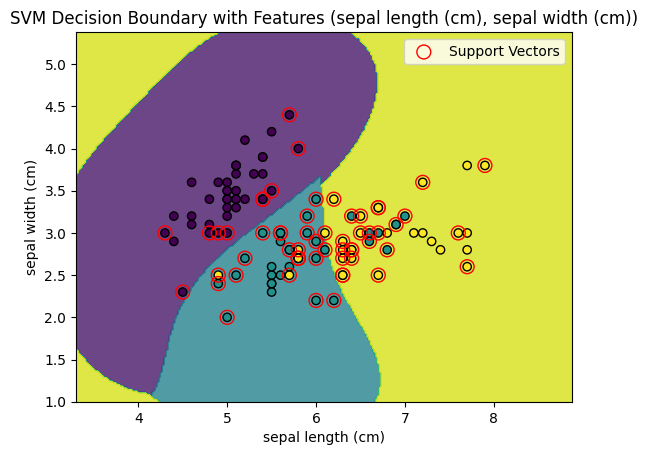

특성 쌍 (sepal length (cm), petal length (cm)) 정확도: 0.956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



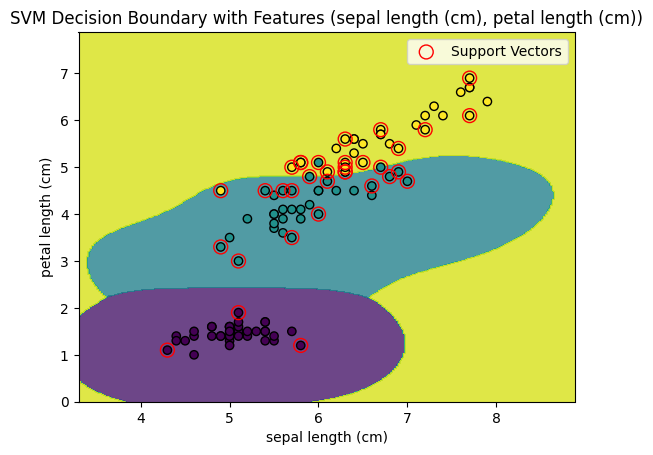

특성 쌍 (sepal length (cm), petal width (cm)) 정확도: 0.956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



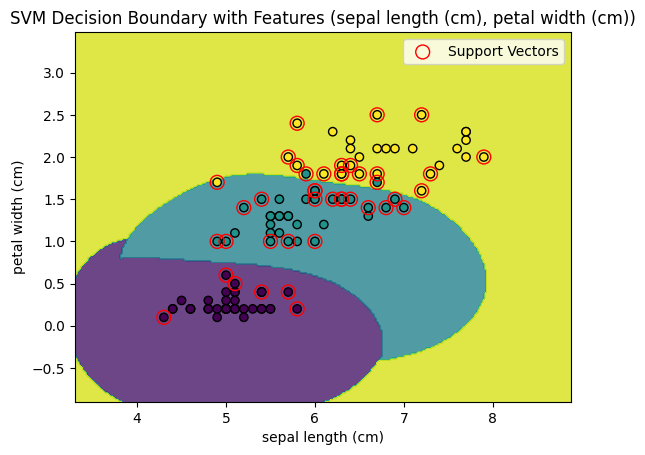

특성 쌍 (sepal width (cm), petal length (cm)) 정확도: 0.956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



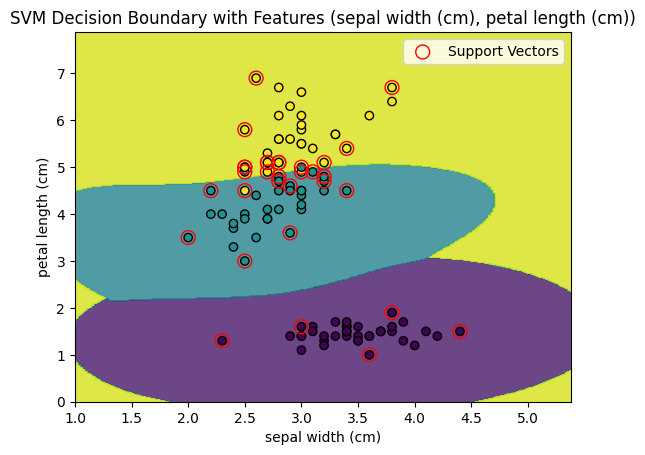

특성 쌍 (sepal width (cm), petal width (cm)) 정확도: 0.956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



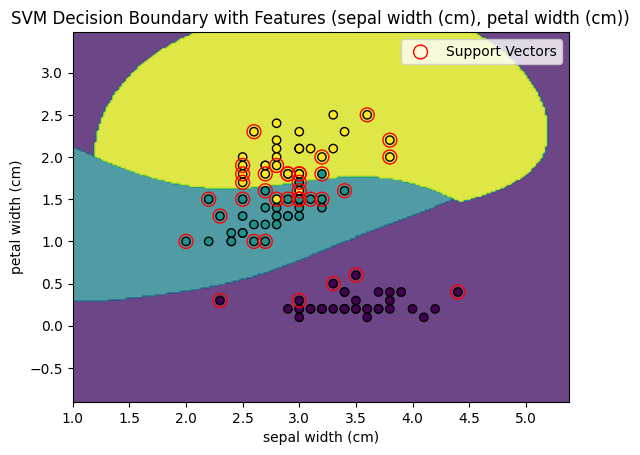

특성 쌍 (petal length (cm), petal width (cm)) 정확도: 0.978
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



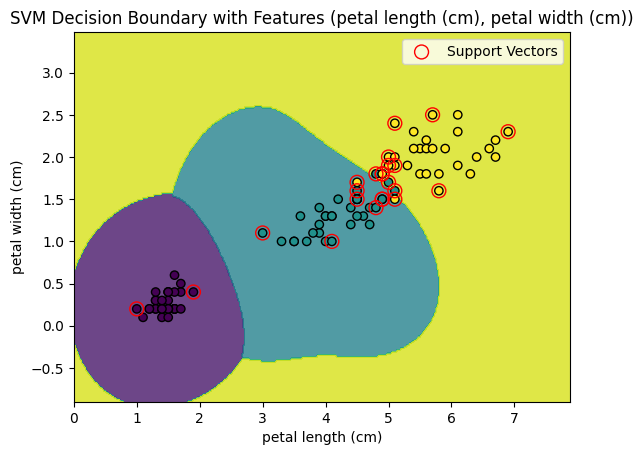

In [ ]:
# 데이터셋 설정
X = iris.data
y = iris.target

# 특성 쌍을 순차적으로 처리
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for (i, j) in feature_pairs:
    X_pair = get_features(X, i, j)
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.3, random_state=33)

    # SVM 모델 생성 및 학습
    model = svm.SVC(kernel='rbf', C=1, gamma=1)                                                       # 노이즈가 적고 과적합을 피하고 싶기 때문에 적은 c값을 설정/ 일반적인 패턴을 보고 싶어서 작은 gamma값 설정
    model.fit(X_train, y_train)

    # 예측 수행 및 정확도 평가
    predictions = model.predict(X_test)
    score = metrics.accuracy_score(y_test, predictions)
    print("특성 쌍 ({}, {}) 정확도: {:.3f}".format(feature_names[i], feature_names[j], score))
    print(metrics.classification_report(y_test, predictions))

    # 결정 경계 시각화
    plot_decision_boundary(X_train, y_train, model, feature_names, i, j)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 범위 설정
# param_grid = {
#     'C': [0.1, 1, 10, 100],             최적의 c값
#     'gamma': [1, 0.1, 0.01, 0.001],      최적의 gamma값
#     'kernel': ['rbf']                     rbf로 고정
# }

# # GridSearchCV로 최적의 파라미터 탐색
# grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)
# grid.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best Parameters:", grid.best_params_)